# Hierarchical Clustering
Implement the required, using classes and methods.
- routines like hc.linkages(X, linkage type) (takes the data and provides linkage matrix)
- hc.dendogram(Z) (takes the linkage matrix and plots a dendogram).

In [53]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
import pandas as pd

In [54]:
# class for hierarchical clustering using scipy
class HierarchicalClustering:
    def __init__(self, data, linkage_method='single'):
        self.data = data
        self.linkage_method = linkage_method
        self.linkage_matrix = None

    def linkages(self):
        # self.linkage_matrix = linkage(self.data, self.linkage_method,optimal_ordering=True)
        self.linkage_matrix = linkage(self.data, self.linkage_method)
        return self.linkage_matrix

    def plot_dendrogram(self, Z):
        # create a figure
        plt.figure(figsize=(25, 10))

        # plot the dendrogram
        dendrogram(Z)

        # show the graph
        plt.show()  


### Hierarchical clustering on Customer Dataset

In [55]:
# load csv into pandas dataframe
df = pd.read_csv('SMAI-Dataset-hc-dataset/new_customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Rudimentary Feature Preprocessing

In [56]:
# drop the 'CustomerID' column
df.drop('CustomerID', axis=1, inplace=True)

# binary encode 'Genre'(Gender) column
# Replace 'Male' with 0 and 'Female' with 1 in the 'Genre' column
df['Genre'] = df['Genre'].replace({'Male': 0, 'Female': 1})

df.head()


,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Genre                   200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


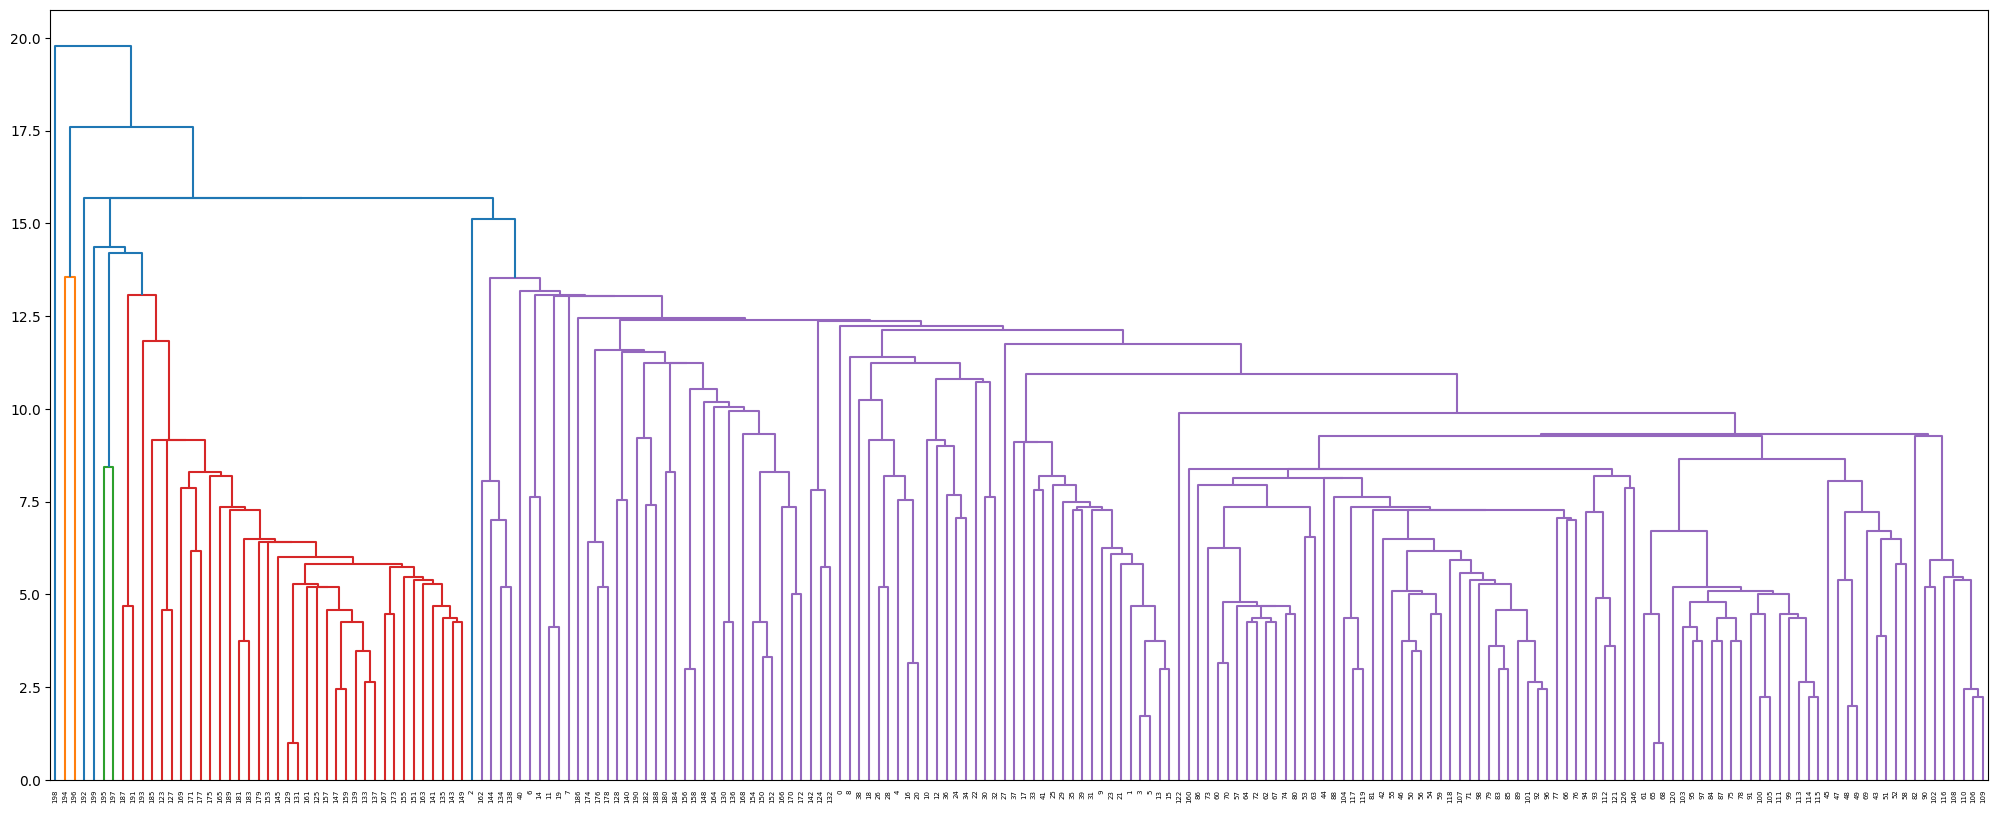

In [58]:
# convert df to numpy array
X = df.values

# perform hierarchical clustering using all features and linkage method as 'single'
hc = HierarchicalClustering(X, linkage_method='single')
linkage_matrix = hc.linkages()
# print(linkage_matrix)  
hc.plot_dendrogram(linkage_matrix)

### Hierarchical Clustering on Gene Expression Dataset

In [59]:
# load csv into pandas dataframe
df = pd.read_csv('SMAI-Dataset-gene-expression/gene.csv')
df.head()

,ID_REF,GSM613412,GSM613413,GSM613414,GSM613415,GSM613416,GSM613417,GSM613418,GSM613419,GSM613420,GSM613421,GSM613422,GSM613423
0,10338001,5192.23000,5974.6500,5393.02000,5158.65000,5244.96000,5143.31000,4621.77000,5173.65000,5811.77000,5465.11000,4972.57000,4528.70000
1,10338002,301.50300,307.6770,362.59600,372.77600,299.98000,308.91200,311.88300,331.53300,344.16100,365.17200,357.14600,372.43600
2,10338003,1850.11000,2037.5400,1891.18000,1752.97000,1718.80000,1762.98000,1630.54000,1905.87000,2141.35000,1891.99000,1652.14000,1593.69000
3,10338004,927.98300,1140.8200,936.43300,918.44000,930.31300,926.49600,793.72900,936.18400,1041.49000,942.37700,891.35900,826.81100
4,10338005,5.24974,5.0173,5.09585,3.76912,5.54982,5.27357,3.79682,4.66623,5.68881,5.25432,4.66148,3.93062


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID_REF     58 non-null     int64  
 1   GSM613412  58 non-null     float64
 2   GSM613413  58 non-null     float64
 3   GSM613414  58 non-null     float64
 4   GSM613415  58 non-null     float64
 5   GSM613416  58 non-null     float64
 6   GSM613417  58 non-null     float64
 7   GSM613418  58 non-null     float64
 8   GSM613419  58 non-null     float64
 9   GSM613420  58 non-null     float64
 10  GSM613421  58 non-null     float64
 11  GSM613422  58 non-null     float64
 12  GSM613423  58 non-null     float64
dtypes: float64(12), int64(1)
memory usage: 6.0 KB


In [61]:
# drop the 'ID_REF' column
df.drop('ID_REF', axis=1, inplace=True)

df.head()

,GSM613412,GSM613413,GSM613414,GSM613415,GSM613416,GSM613417,GSM613418,GSM613419,GSM613420,GSM613421,GSM613422,GSM613423
0,5192.23000,5974.6500,5393.02000,5158.65000,5244.96000,5143.31000,4621.77000,5173.65000,5811.77000,5465.11000,4972.57000,4528.70000
1,301.50300,307.6770,362.59600,372.77600,299.98000,308.91200,311.88300,331.53300,344.16100,365.17200,357.14600,372.43600
2,1850.11000,2037.5400,1891.18000,1752.97000,1718.80000,1762.98000,1630.54000,1905.87000,2141.35000,1891.99000,1652.14000,1593.69000
3,927.98300,1140.8200,936.43300,918.44000,930.31300,926.49600,793.72900,936.18400,1041.49000,942.37700,891.35900,826.81100
4,5.24974,5.0173,5.09585,3.76912,5.54982,5.27357,3.79682,4.66623,5.68881,5.25432,4.66148,3.93062


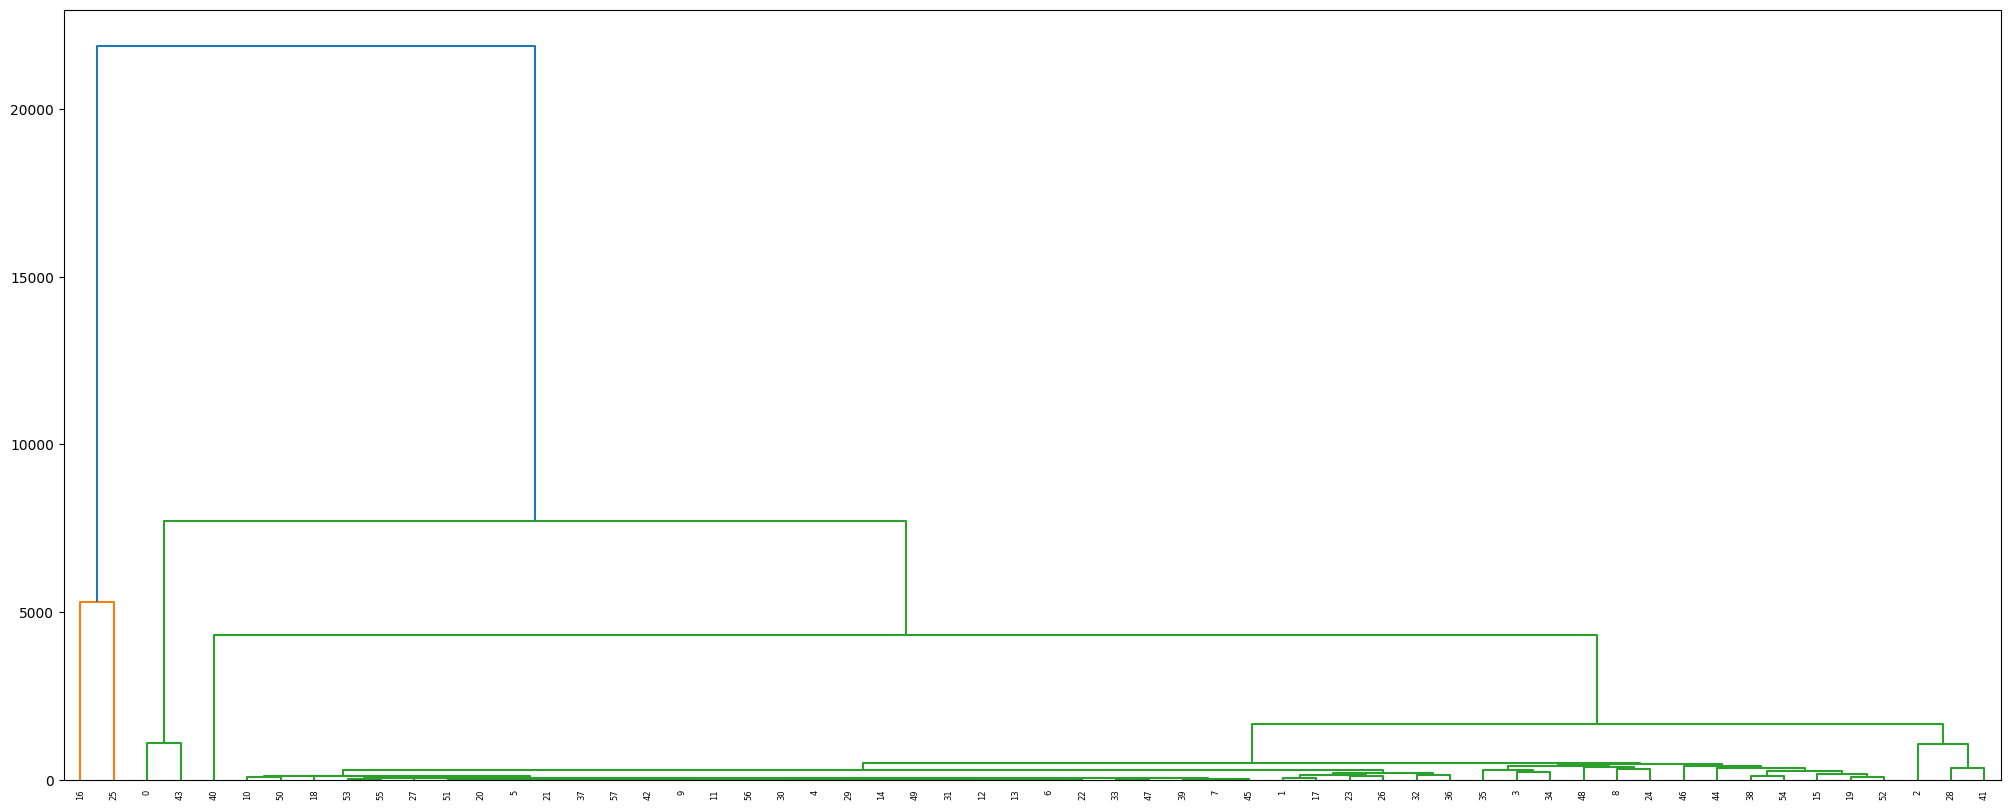

In [62]:
# convert df to numpy array
X = df.values

# perform hierarchical clustering using all features and linkage method as 'single'
hc = HierarchicalClustering(X, linkage_method='single')
linkage_matrix = hc.linkages()
# print(linkage_matrix)  
hc.plot_dendrogram(linkage_matrix)